# ***TITANIC DATASET SURVIVAL PREDICTION***

1. Installing and Importing Libraries
2. Data Acquisition & Description (Finding Info and Stats in Data)
3. Data Pre-Processing (Handling Missing Data and Performing Feature Engineering)
4. Exploratory Data Analysis
5. Feature Selection, Encoding Categorical Features, and Data Preparation
6. Model Building and Evaluation (Logistic Regression)

# ***Installing and Importing Libraries***

### Installing Libraries

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 70.2 MB/s eta 0:00:00


### Upgrading Libraries

In [ ]:
!pip install -q --upgrade pandas-profiling

### Importing Libraries

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# ***Data Acquisition & Description***

In [ ]:
train = pd.read_csv("/content/train.csv")     # Importing data using pd.read_csv
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of **891 observations of 12 columns**.

### Information about the types of features

In [ ]:
print("Shape of the Data is :", train.shape)

Shape of the Data is : (891, 12)


- This dataset contains 891 rows and 12 columns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are **null values present** in Age, Cabin and Embarked columns.

- **Each feature** seems to have **correct data type**, except for the **Pclass**.

### Data Statistics (Information about the data)


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


- The **average age** of the people in titanic was about **29 years**.

- **Minimum age** seems to be between **0-1 years**. Where, the **Max age** was **80**.

- The **average Fare** was **32 dollars** 

- **25%** of **fare** was **7 dollar**

# ***Data Pre-Processing***

### Pre-Profiling Report


In [ ]:
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation:**


- Reports shows that the **number of variables**	in our data is **12**.

- **Number of observations(rows)** is	891

- **Duplicate rows** are **0**

- There is huge amount of **missing data** in cabin.

- The **cabin and ticket features** are **highly cardinal** too.

- **SibSp has 68% of 0 values** which makes sense because this features tells us about the sibling/spouse of the passenger and maybe they are single.

### Identification & Handling of Missing Data (Null Values)

In [ ]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = train.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = train.isnull().sum().values/train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = train[train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = train[train == 0].count().values / train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,177.00000,0.00000,0.00000,0.00000,0.00000,687.00000,2.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,19.87000,0.00000,0.00000,0.00000,0.00000,77.10000,0.22000
Zero Frequency,0.00000,549.00000,0.00000,0.00000,0.00000,0.00000,608.00000,678.00000,0.00000,15.00000,0.00000,0.00000
Missing %age,0.00000,61.62000,0.00000,0.00000,0.00000,0.00000,68.24000,76.09000,0.00000,1.68000,0.00000,0.00000


- Missing value **imputation for numerical features can be done using the mean or the median**.
- **Mean** is used to **impute the missing values** for the **feature that is normally distributed**.
- **Median** is used to **impute missing values in highly skewed features**.

In [ ]:
median_age = train.Age.median()#calculating the median of the age
median_fare = train.Fare.median()#calculating the median of the Fare
train.Age.fillna(median_age, inplace = True)#filling null values with the median of the Age
train.Fare.fillna(median_fare, inplace = True)#filling null values with the median of Fare
train.Embarked = train.Embarked.fillna(train['Embarked'].mode()[0])#filling null value with the Mode of the Features.

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with **median values**.
    - Dropping the column __'Cabin'__ as it has **too many _null_ values** and due to the presence of **high cardinality** it is impossible to impute with anything.

In [ ]:
train.drop(['PassengerId','Cabin'], axis = 1,inplace = True) #dropping the highly cardinal values.

### Feature Engineering

- New column that takes in the values of sibling/Spouse and Parents/Child aboard the RMS Titanic.

- Adding 1 because including the passenger too.

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# ***Exploratory Data Analysis***

**1. The frequency and proportion of Survival**

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

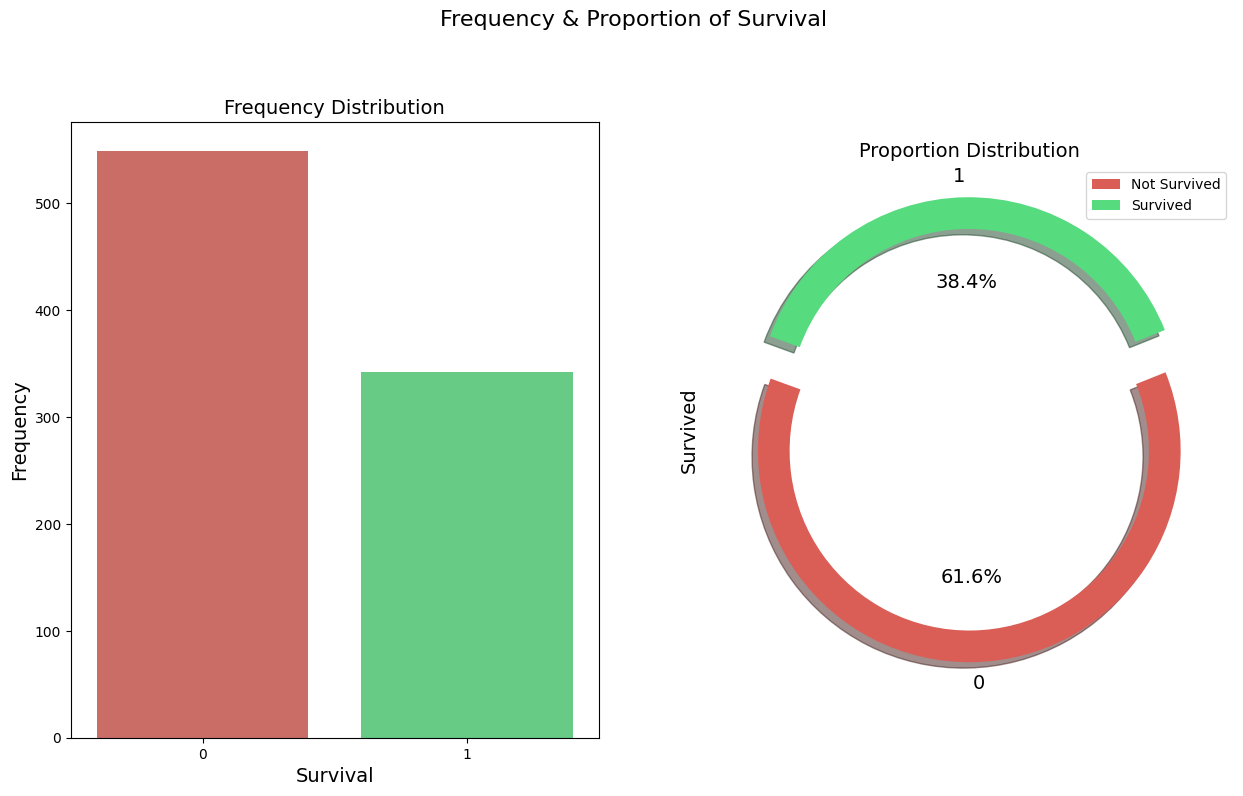

In [ ]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Survived', data = train, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Survival', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
train['Survived'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['Not Survived', 'Survived'])
plt.ylabel(ylabel = 'Survived', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.suptitle(t = 'Frequency & Proportion of Survival', y = 1.02, size = 16)
plt.show()

**Observation:**

- There are lesser number of people that **Survived**.

- There is **class imbalance** in the data set.

- This might pose a **big problem** so it has to be handled.

**2. Association between Age and Survival**


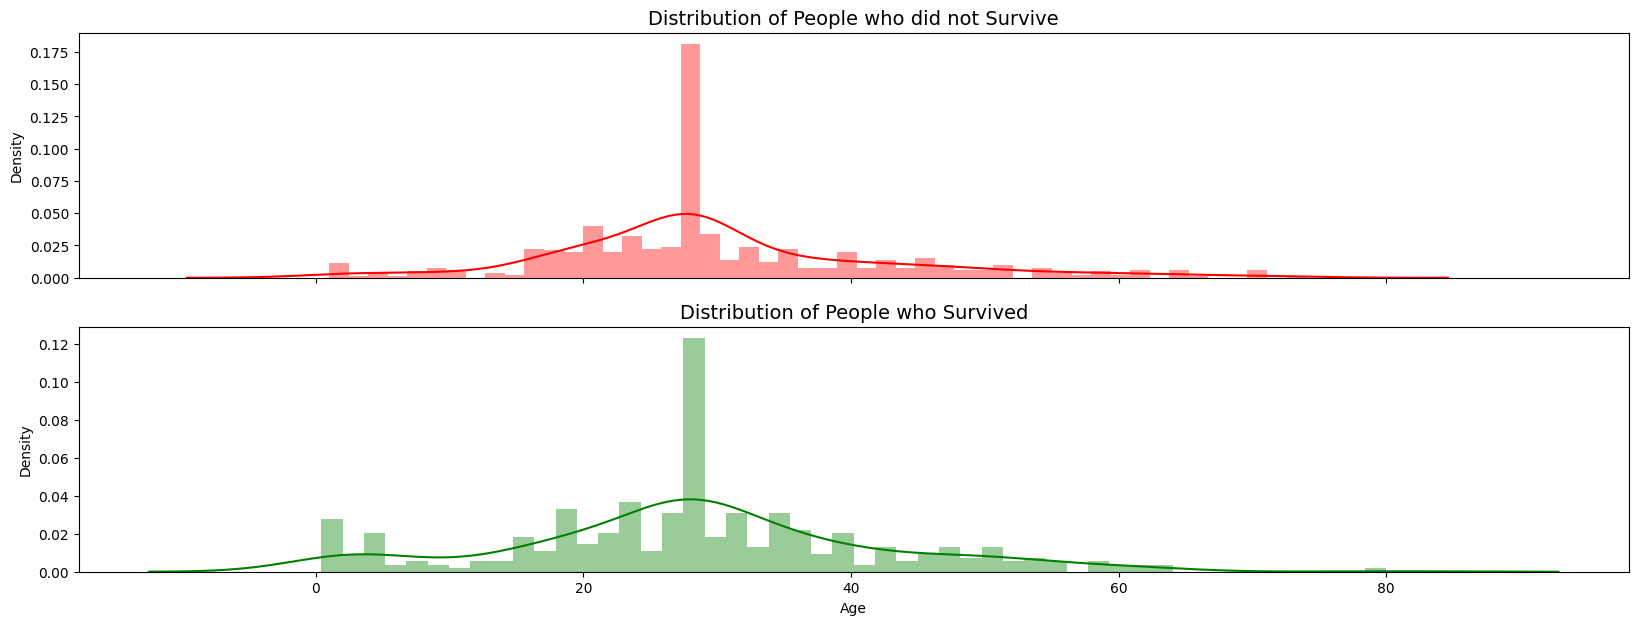

In [ ]:
# Slicing data with non-survial
Not_Survived = train['Age'][train['Survived'] == 0]

# Slicing data with survival
Survived = train['Age'][train['Survived'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_Survived, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who did not Survive', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Survived, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who Survived', size = 14)
plt.show()

**Observation:**

- The **distribution** of both the cases are **similar**.

- The second graph has a little **rise** in the bar **at the starting** of the graphs, as during evacuation **childrens were prioritized** then female and then male.

**3. Relation between Survived and PClass**

In [ ]:
Not_Survived = train['Pclass'][train['Survived'] == 0]
Not_Survived.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [ ]:
# Slicing data with non-survival
Not_Survived = train['Pclass'][train['Survived'] == 0].value_counts()

# Slicing data with survival
Survived = train['Pclass'][train['Survived'] == 1].value_counts()
print("Survived\n" ,Survived, "Not-Survived\n", Not_Survived)
# fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
# sns.countplot(Not_Survived, ax=ax1)
# ax1.set_title(label = 'Distribution of People who did not Survive', size = 14)
# ax1.set_xlabel(xlabel = '')
# sns.countplot( Survived, ax=ax2)
# ax2.set_title(label = 'Distribution of People who did Survive', size = 14)
# plt.show()

Survived
 1    136
3    119
2     87
Name: Pclass, dtype: int64 Not-Survived
 3    372
2     97
1     80
Name: Pclass, dtype: int64


**Observation:**

- We can **observe** people who did not **Survive** where mostly from Pclass 3.

- Most of the people **Survived** from Pclass 1.

**4. Relation between Fare and PClass**

In [ ]:
train[['Fare','Pclass']].groupby(by = 'Pclass').describe()

Fare                                                       \
           count     mean      std     min      25%      50%      75%   
Pclass                                                                  
1      216.00000 84.15469 78.38037 0.00000 30.92395 60.28750 93.50000   
2      184.00000 20.66218 13.41740 0.00000 13.00000 14.25000 26.00000   
3      491.00000 13.67555 11.77814 0.00000  7.75000  8.05000 15.50000   

                  
             max  
Pclass            
1      512.32920  
2       73.50000  
3       69.55000

**Observation:**

- **Pclass 1** belonged to the **luxurious group** of people where the **max fare** is **512**. No doubt, this group was **given preference for evacuation.**

# ***Post Data Processing & Feature Selection***


- **Performing encoding of the categorical columns** and **feeding it** to the **LogisticRegression**.

### Feature Selection


Text(0.5, 1.0, 'Correlation between features')

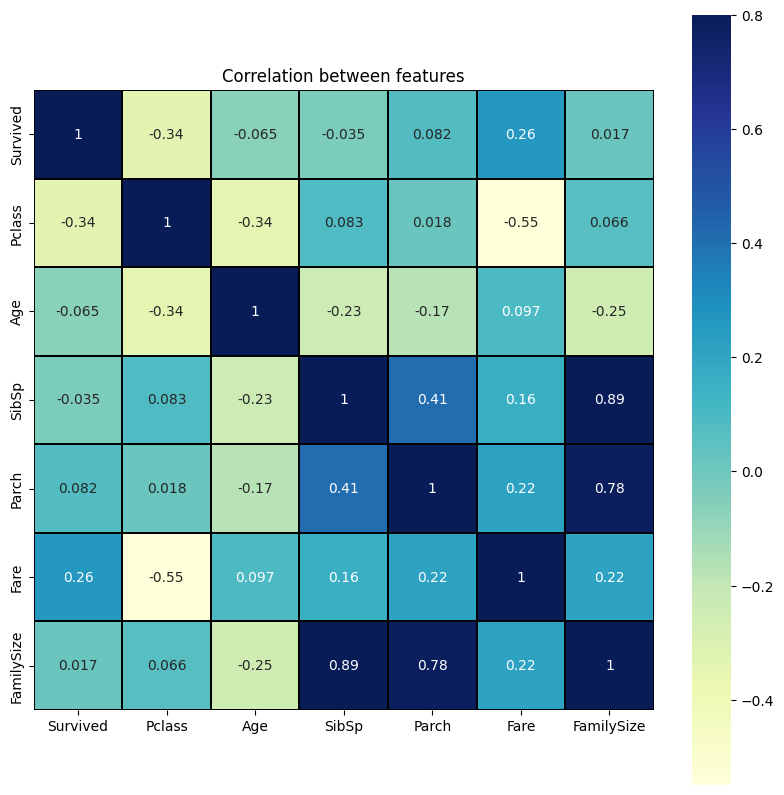

In [ ]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:** 

- __Age and Pclass are negatively corelated with Survived.__
- **FamilySize** is made from **Parch and SibSb** only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With **high corelation** we face __redundancy__ issues.

* Dropping few features like `'Name','Ticket','SibSp','Parch'`




In [ ]:
train_new = train.drop(['Name','Ticket','SibSp','Parch'], axis = 1)
train_new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.00000,7.25000,S,2
1,1,1,female,38.00000,71.28330,C,2
2,1,3,female,26.00000,7.92500,S,1
3,1,1,female,35.00000,53.10000,S,2
4,0,3,male,35.00000,8.05000,S,1


### Post-Profiling Report
- After doing **missing value Imputation**, **feature engineering**, **Removing unwanted features** we will now look at the report again.

In [ ]:
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


### Encoding Categorical Features

In [ ]:
train_new.dtypes #Checking for data types of features

Survived        int64
Pclass          int64
Sex            object
Age           float64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

We can see that Pclass is a categorical feature so we will convert it to object type.

In [ ]:
train_new['Pclass'] = train_new.Pclass.astype(dtype=object)

In [ ]:
encoded_data = pd.get_dummies(train_new) 
encoded_data.head()

,Survived,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.00000,7.25000,2,0,0,1,0,1,0,0,1
1,1,38.00000,71.28330,2,1,0,0,1,0,1,0,0
2,1,26.00000,7.92500,1,0,0,1,1,0,0,0,1
3,1,35.00000,53.10000,2,1,0,0,1,0,0,0,1
4,0,35.00000,8.05000,1,0,0,1,0,1,0,0,1


### Data Preparation
- **Spliting** the **data** in **training** and **testing** part.

In [ ]:
X = encoded_data.drop('Survived',axis = 1)
y = encoded_data['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_val.shape, y_val.shape)

Training Data Shape: (801, 11) (801,)
Testing Data Shape: (90, 11) (90,)


# ***Model Development & Evaluation***


- **Developing Logistic Regression using input features** and **tune** the **model if required**.

- **Analyzing the results** obtained and **making the observation**.

- **Model evaluation purpose** : **Accuracy**, **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.

### Logistic Regression - Baseline Model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

### Using Trained Model for Prediction

In [ ]:
#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_val = logreg.predict(X_val)

### Confusion Matrix



- **True Positive (TP)** : Observation is positive, and is predicted to be positive.
- **False Negative (FN)** : Observation is positive, but is predicted negative.
- **True Negative (TN)** : Observation is negative, and is predicted to be negative.
- **False Positive (FP)** : Observation is negative, but is predicted positive.

In [ ]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_val))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  45                  10
Actual Survived              11                  24


**Observations** 
- True Positive(TP) = 45
- True Negative(TN) = 24
- False Positive(FP) = 11
- False Negative(FN) = 10

### Checking Accuracy

In [ ]:
pred = logreg.predict(X_val)
print('Accuracy score for test data is:', accuracy_score(y_val,pred))
print('Accuracy percentage is:', np.round(accuracy_score(y_val,pred)*100, 2), '%')

Accuracy score for test data is: 0.7666666666666667
Accuracy percentage is: 76.67 %


# ***Conclusion***


- **Studied in breifly about the data**, its **characteristics** and its **distribution**.

- **Explored** some **questions related** to survive and not survived.

- **Investigated in depth about the features** which to **retain** and which to **discard**.

- **Performed model training**.

- **Observed metrics for our prediction**.

- This **model** now can **help** in **identifying** who survived and who did not survive with an **Accuracy** of **76.67%**.

# ***Model Testing***

In [ ]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.82920,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.00000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.68750,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.66250,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.28750,NaN,S


In [ ]:
median_age = test.Age.median()#calculating the median of the age
median_fare = test.Fare.median()#calculating the median of the Fare
test.Age.fillna(median_age, inplace = True)#filling null values with the median of the Age
test.Fare.fillna(median_fare, inplace = True)#filling null values with the median of Fare
test.Embarked = test.Embarked.fillna(test['Embarked'].mode()[0])#filling null value with the Mode of the Features

In [ ]:
test.drop(['PassengerId','Cabin'], axis = 1,inplace = True) #dropping the highly cardinal values

In [ ]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
test_new = test.drop(['Name','Ticket','SibSp','Parch'], axis = 1)
test_new.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,34.50000,7.82920,Q,1
1,3,female,47.00000,7.00000,S,2
2,2,male,62.00000,9.68750,Q,1
3,3,male,27.00000,8.66250,S,1
4,3,female,22.00000,12.28750,S,3


In [ ]:
test_new['Pclass'] = test_new.Pclass.astype(dtype=object)

In [ ]:
X_test = pd.get_dummies(test_new) 
X_test.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,7.82920,1,0,0,1,0,1,0,1,0
1,47.00000,7.00000,2,0,0,1,1,0,0,0,1
2,62.00000,9.68750,1,0,1,0,0,1,0,1,0
3,27.00000,8.66250,1,0,0,1,0,1,0,0,1
4,22.00000,12.28750,3,0,0,1,1,0,0,0,1


In [89]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,